# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL

##Used url from OpenWeather class activity 
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        ##Made with a combination of examples in class activities and the OpenWeather documentation online
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | checker hall
City not found. Skipping...
Processing Record 3 of Set 1 | jose bonifacio
Processing Record 4 of Set 1 | nuuk
Processing Record 5 of Set 1 | kulia village
City not found. Skipping...
Processing Record 6 of Set 1 | fairfax
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | dryden
Processing Record 9 of Set 1 | manokwari
Processing Record 10 of Set 1 | illizi
Processing Record 11 of Set 1 | amga
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | dar naim
City not found. Skipping...
Processing Record 14 of Set 1 | atlantis
Processing Record 15 of Set 1 | afaahiti
Processing Record 16 of Set 1 | lobito
Processing Record 17 of Set 1 | muggensturm
Processing Record 18 of Set 1 | vorgashor
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 2

In [8]:
# Convert the cities weather data into a Pandas DataFrame

##Just need simple pandas DataFrame method on the city_data we generated above
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,282.76,60,99,6.22,NZ,1732166851
1,jose bonifacio,-21.0528,-49.6883,298.25,71,91,1.56,BR,1732166854
2,nuuk,64.1835,-51.7216,270.49,86,100,1.31,GL,1732166855
3,fairfax,38.8501,-77.3497,280.89,80,75,8.23,US,1732166857
4,coquimbo,-29.9533,-71.3436,287.00,94,75,0.51,CL,1732166858


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,282.76,60,99,6.22,NZ,1732166851
1,jose bonifacio,-21.0528,-49.6883,298.25,71,91,1.56,BR,1732166854
2,nuuk,64.1835,-51.7216,270.49,86,100,1.31,GL,1732166855
3,fairfax,38.8501,-77.3497,280.89,80,75,8.23,US,1732166857
4,coquimbo,-29.9533,-71.3436,287.00,94,75,0.51,CL,1732166858


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

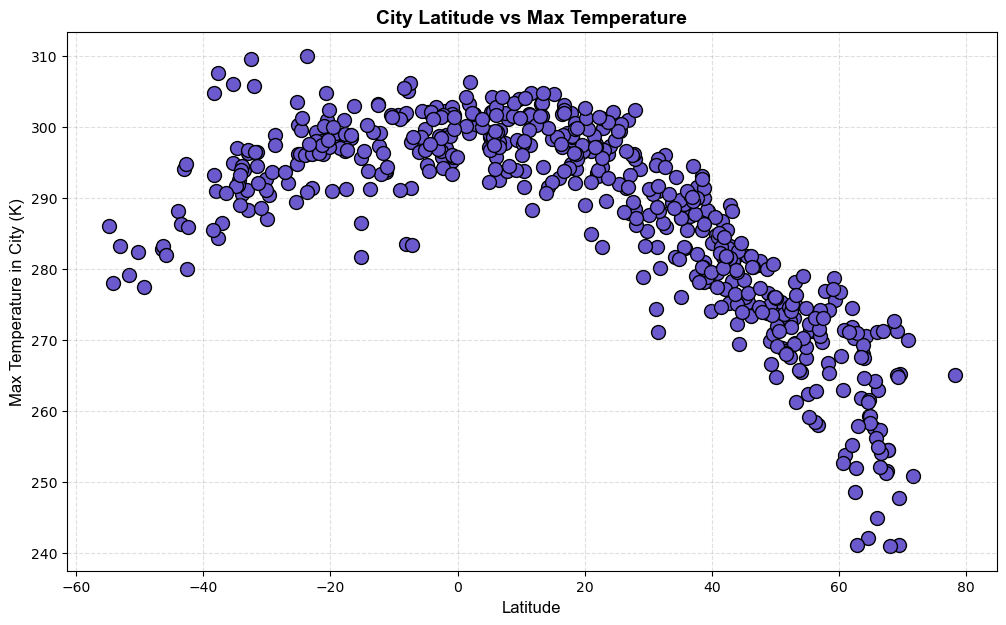

In [311]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize = (12, 7))

plt.scatter(city_data_df.Lat, city_data_df['Max Temp'], color = 'slateblue', edgecolor = 'black', s = 100)

# Incorporate the other graph properties
plt.title('City Latitude vs Max Temperature', fontfamily = 'Arial', fontweight = 'bold', fontsize = 14)
plt.xlabel('Latitude', fontsize = 12, fontfamily = 'Arial')
plt.ylabel('Max Temperature in City (K)', fontsize = 12, fontfamily = 'Arial')
plt.grid(linestyle = '--', alpha = 0.25, color = 'grey')


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

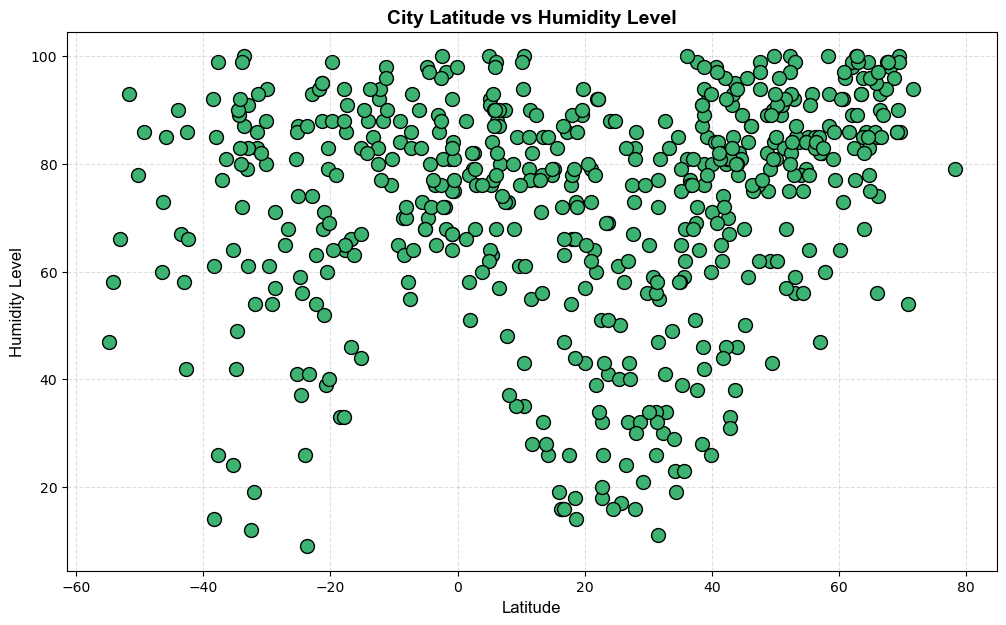

In [312]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize = (12, 7))

plt.scatter(city_data_df.Lat, city_data_df.Humidity, color = 'mediumseagreen', edgecolor = 'black', s = 100)

# Incorporate the other graph properties

plt.title('City Latitude vs Humidity Level', fontfamily = 'Arial', fontweight = 'bold', fontsize = 14)
plt.xlabel('Latitude', fontsize = 12, fontfamily = 'Arial')
plt.ylabel('Humidity Level', fontsize = 12, fontfamily = 'Arial')
plt.grid(linestyle = '--', alpha = 0.25, color = 'grey')


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

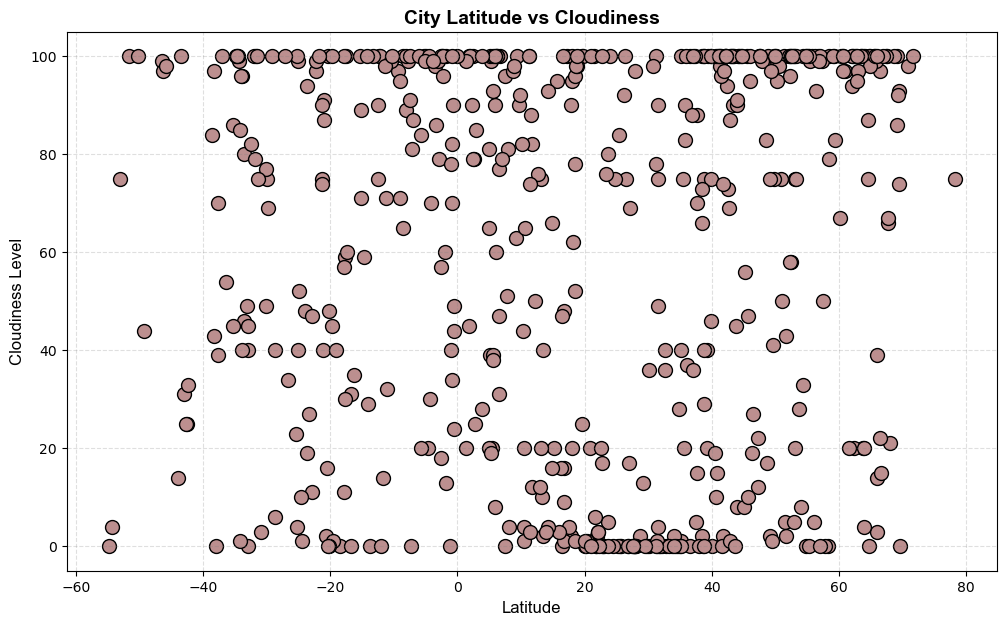

In [313]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize = (12, 7))

plt.scatter(city_data_df.Lat, city_data_df.Cloudiness, color = 'rosybrown', edgecolor = 'black', s = 100)

# Incorporate the other graph properties

plt.title('City Latitude vs Cloudiness', fontfamily = 'Arial', fontweight = 'bold', fontsize = 14)
plt.xlabel('Latitude', fontsize = 12, fontfamily = 'Arial')
plt.ylabel('Cloudiness Level', fontsize = 12, fontfamily = 'Arial')
plt.grid(linestyle = '--', alpha = 0.25, color = 'grey')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

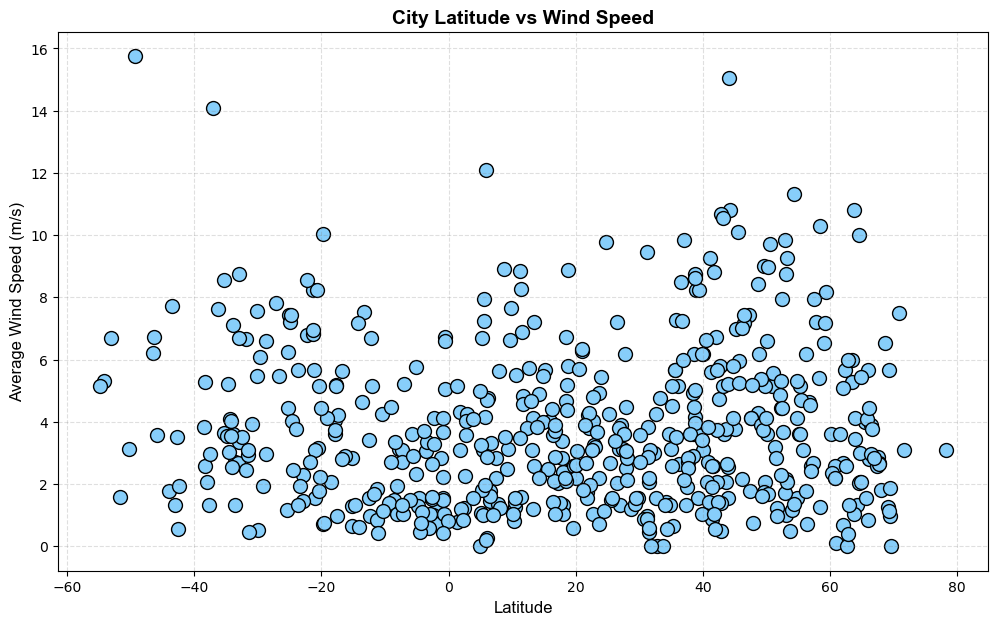

In [314]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize = (12, 7))

plt.scatter(city_data_df.Lat, city_data_df['Wind Speed'], color = 'lightskyblue', edgecolor = 'black', s = 100)

# Incorporate the other graph properties

plt.title('City Latitude vs Wind Speed', fontfamily = 'Arial', fontweight = 'bold', fontsize = 14)
plt.xlabel('Latitude', fontsize = 12, fontfamily = 'Arial')
plt.ylabel('Average Wind Speed (m/s)', fontsize = 12, fontfamily = 'Arial')
plt.grid(linestyle = '--', alpha = 0.25, color = 'grey')


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [315]:
# Define a function to create Linear Regression plots

##The information that will change in the regression are the only inputs we need for the function
##The parameter we are comparing to latitude, whether its southern or northen hemishere, and the coordinates
##I'm going to try to make a function where I don't have to type in 'Lat' each time, just north or south. to be as pythonic as possible I'd love to type in the fewest amount of inputs as I can
##Most of the regression function is consistent though
def regression_line(param_vs_lat, hemisphere):

    if hemisphere == 'south':
        x_values = southern_hemi_df.Lat
        y_values = southern_hemi_df[(param_vs_lat)]
    elif hemisphere == 'north': 
        x_values = northern_hemi_df.Lat
        y_values = northern_hemi_df[(param_vs_lat)]
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.figure(figsize = (12, 7))
    plt.scatter(x_values,y_values, color = 'dodgerblue', edgecolor = 'black', s=75)
    plt.plot(x_values,regress_values,color = 'firebrick', lw = 2.5)
    plt.xlabel("City Latitude")
    plt.ylabel(f"{param_vs_lat}")
    plt.title(f"Latitude vs {param_vs_lat}")
    plt.grid(linestyle = '--', alpha = 0.25, color = 'grey')
    plt.annotate(line_eq, xy=(0.02, 0.02), xycoords='axes fraction', fontsize=12, color = 'firebrick')
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()

In [316]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

##Just going to make a mask to find cities with latitude more than or equal and locate it
mask = city_data_df["Lat"] >= 0
northern_hemi_df = city_data_df.loc[mask]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,nuuk,64.1835,-51.7216,270.49,86,100,1.31,GL,1732166855
3,fairfax,38.8501,-77.3497,280.89,80,75,8.23,US,1732166857
5,dryden,49.7833,-92.7503,274.31,100,100,2.06,CA,1732166859
7,illizi,26.4833,8.4667,291.35,24,75,2.02,DZ,1732166862
8,amga,60.8953,131.9608,253.71,96,97,0.11,RU,1732166863


In [317]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

##same as above but less than zero
mask = city_data_df["Lat"] < 0
southern_hemi_df = city_data_df.loc[mask]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,282.76,60,99,6.22,NZ,1732166851
1,jose bonifacio,-21.0528,-49.6883,298.25,71,91,1.56,BR,1732166854
4,coquimbo,-29.9533,-71.3436,287.00,94,75,0.51,CL,1732166858
6,manokwari,-0.8667,134.0833,302.51,67,82,3.68,ID,1732166861
9,blackmans bay,-43.0167,147.3167,294.00,58,31,1.34,AU,1732166864


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.8214181746264779


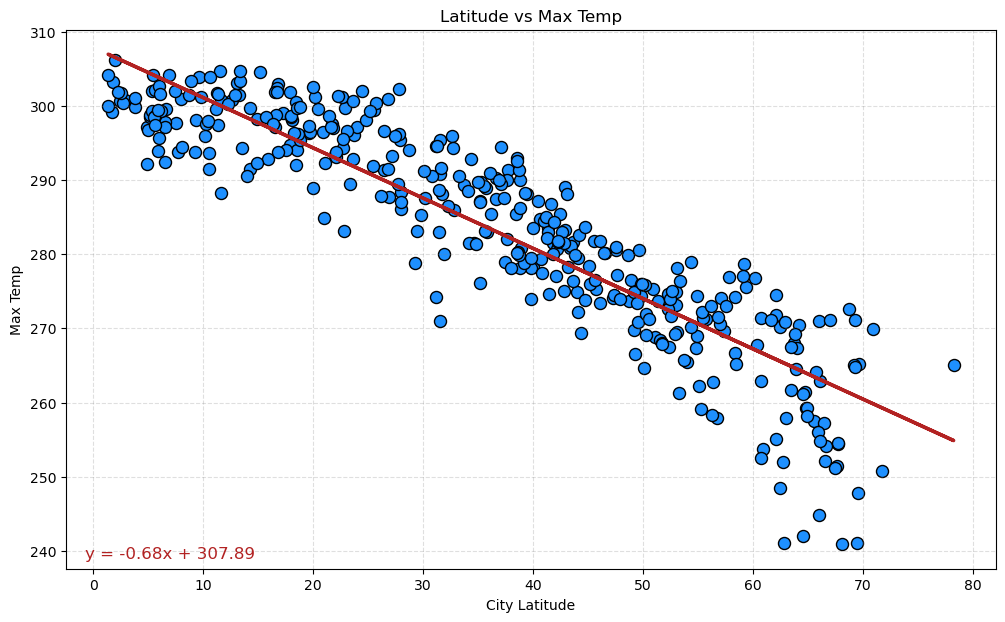

In [318]:
# Linear regression on Northern Hemisphere
regression_line('Max Temp', 'north')

The r^2-value is: 0.2921301589519583


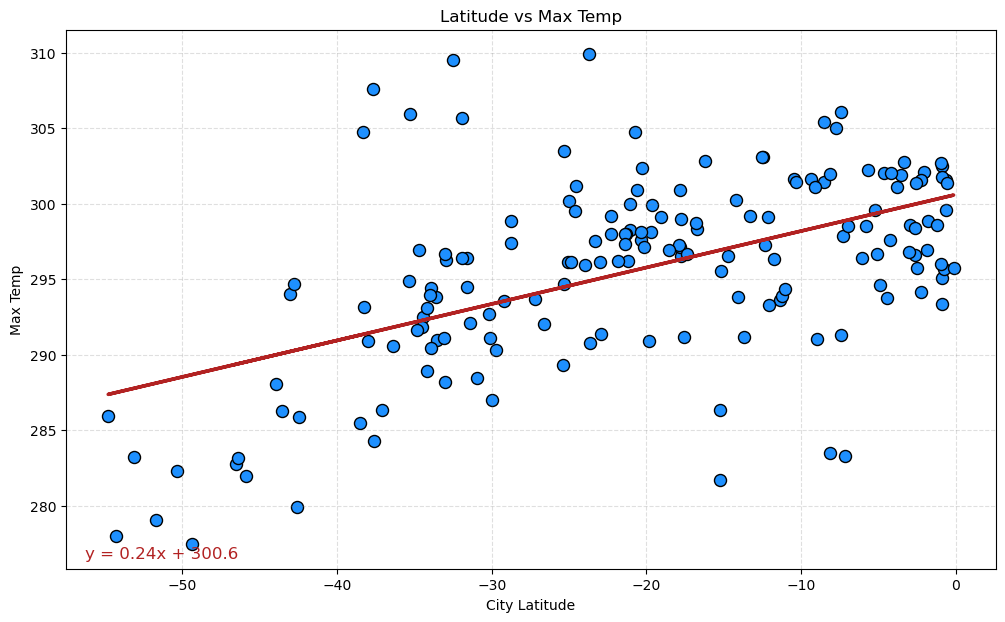

In [319]:
# Linear regression on Southern Hemisphere
regression_line('Max Temp', 'south')

**Discussion about the linear relationship:** The relationship between latitude and max temp seems to be the most drastic, meaning it has the steepest slope. In the Southen Hemisphere there is a positive correlation, in  the Norhtner Hemisphere there is a negative correlation. While the correlations are opposite in each respective hemisphere, the degree of correlation is very similar. 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.09928089868814972


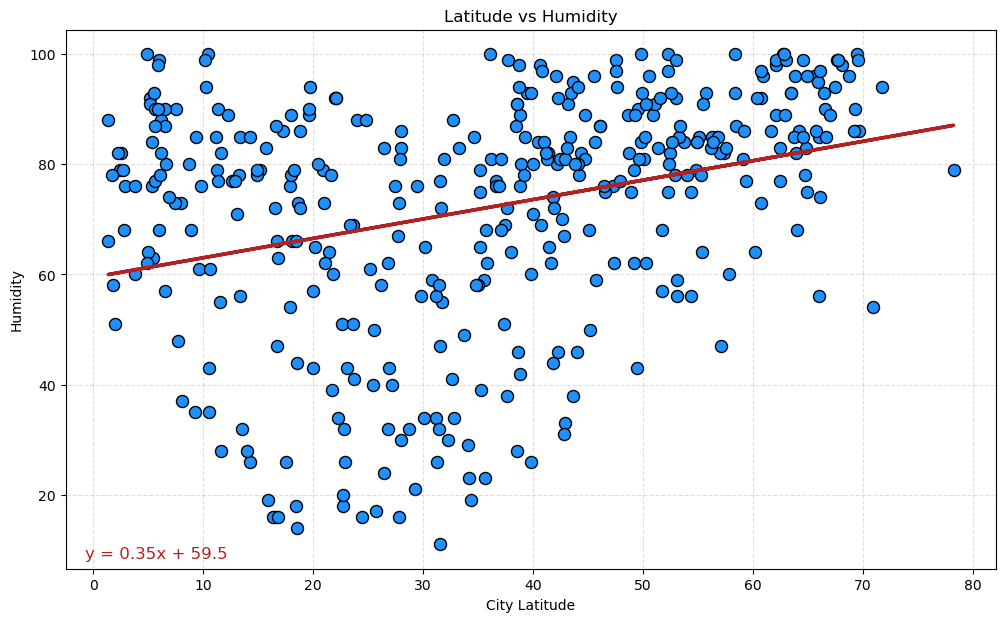

In [320]:
# Northern Hemisphere

regression_line('Humidity', 'north')

The r^2-value is: 0.042616527122166126


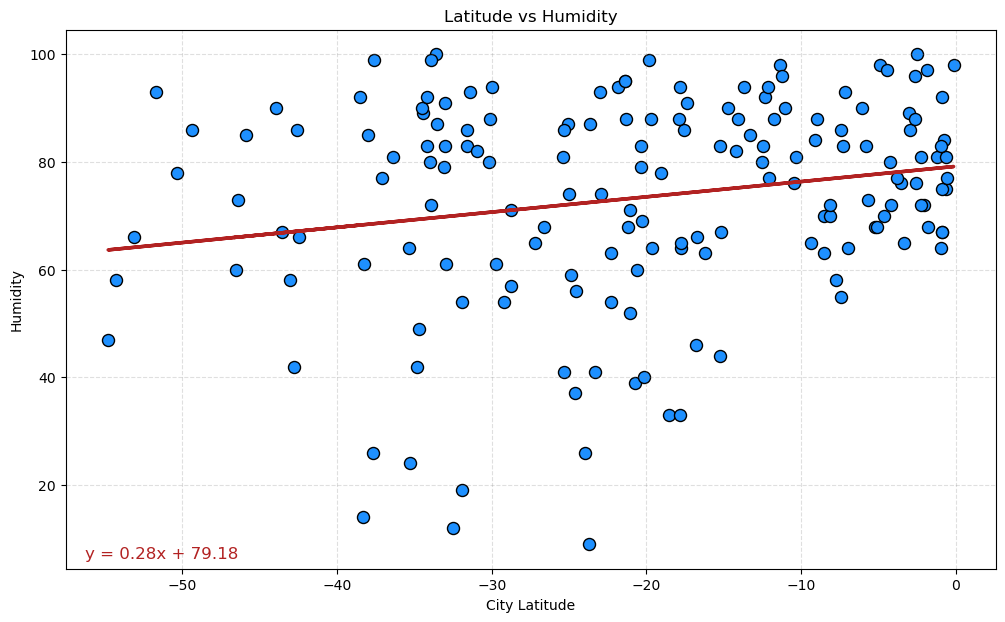

In [321]:
# Southern Hemisphere
regression_line('Humidity', 'south')

**Discussion about the linear relationship:** In both hemispheres there is a postive linear relationship. As the latitude increases, so does the humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.038799166116389845


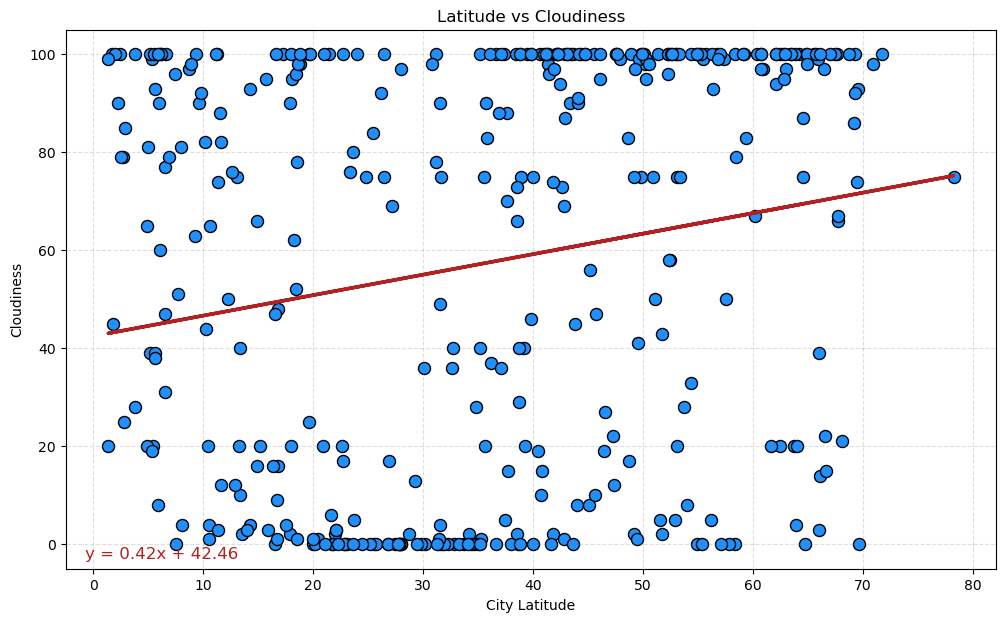

In [322]:
# Northern Hemisphere
regression_line('Cloudiness', 'north')

The r^2-value is: 0.014112265231283448


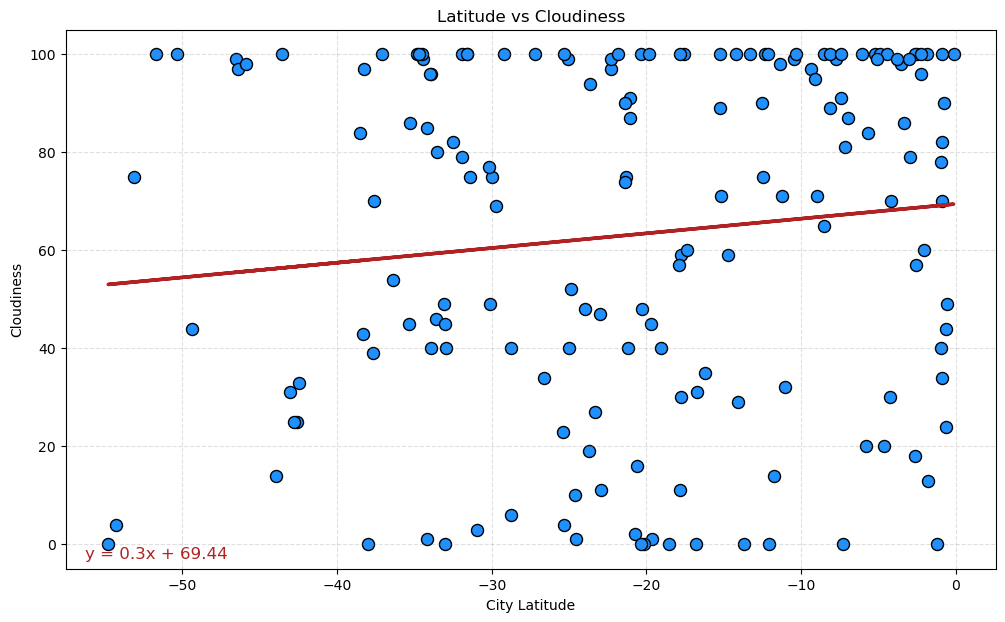

In [323]:
# Southern Hemisphere
regression_line('Cloudiness', 'south')

**Discussion about the linear relationship:** Similar to the humidity relationship, there is a positive correlation in both hemispheres. Although the degree of correlation is not as drastic. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.008529569392365594


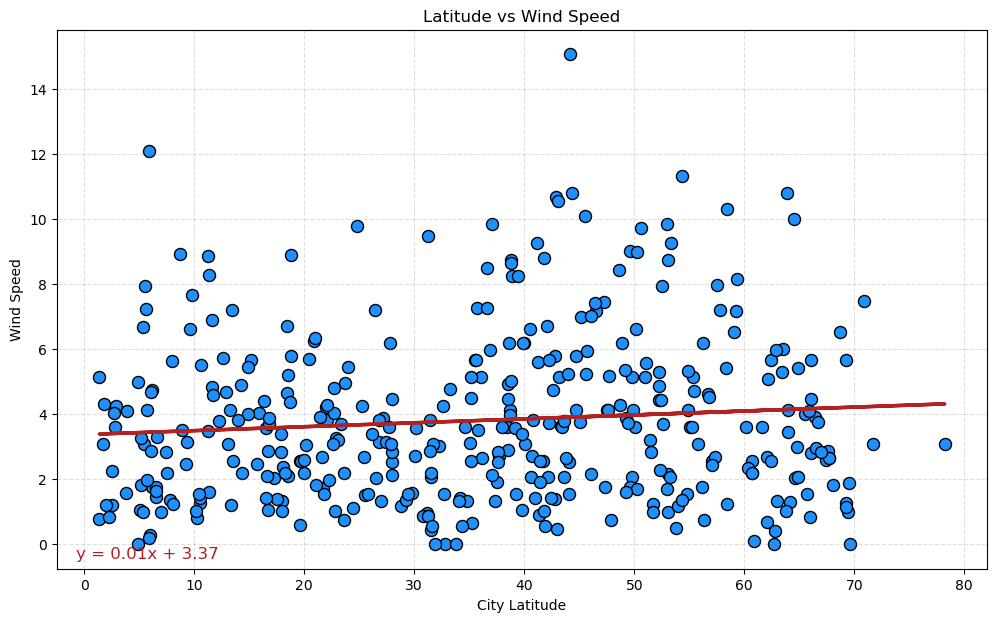

In [324]:
# Northern Hemisphere
regression_line('Wind Speed', 'north')

The r^2-value is: 0.11460201363375476


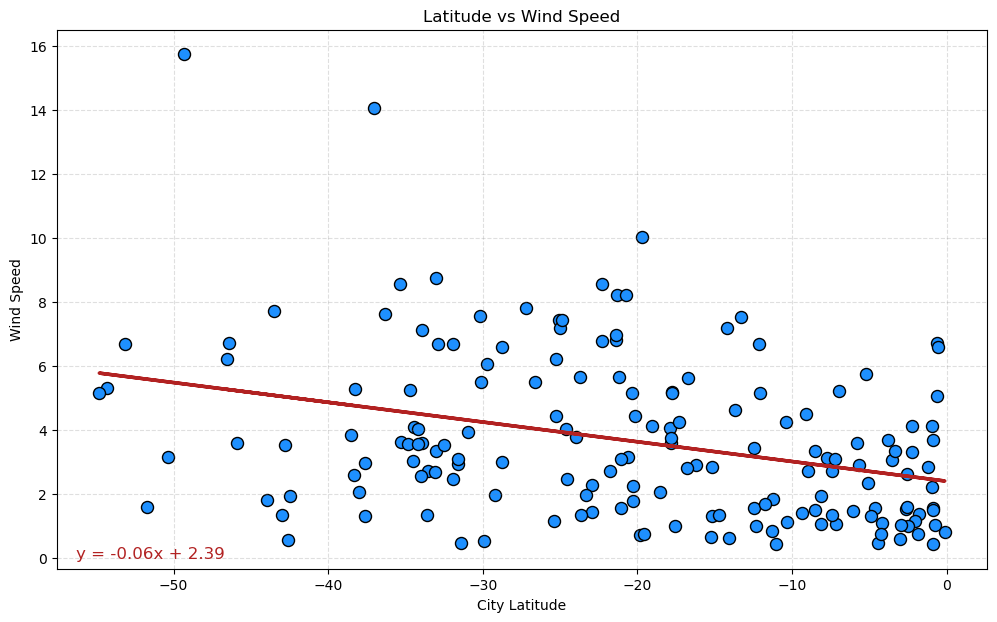

In [325]:
# Southern Hemisphere
regression_line('Wind Speed', 'south')

**Discussion about the linear relationship:** In the north hemisphere there is a very slight positive relationship, although I would not say it is subtle. In the southern hemisphere there is a negative relationship, and it is more apparent. 